<center>

# **Progetto Easy Maze**

</center>

## Informazioni generali:
### Legenda:
- S (Start): posizione iniziale dell’agente
- E (Exit) : uscita
- X : muro invalicabile
- 1/4 : cella calpestabile e costo per attraversarla

### Dominio e vincoli:
L'agente all'interno del labirinto è soggetto ai seguenti **vincoli**:
- v1 = "può compiere solo un passo alla volta";
- v2 = "può muoversi solo tra caselle adiacenti";
- v3 = "può muoversi solo Left/Right/Up/Down";
- v4 = "non è ammesso lo spostamento in diagonale";
- v5 = "non è permesso transitare dentro le caselle con la X all'interno".

Invece il labirinto deve rispettare le seguenti **caratteristiche**:  
- v6 = "la matrice deve essere minimo 2x2";
- v7 = "deve avere 1 ingresso S per la posizione iniziale dell'agente, inserita agl'estremi della matrice";
- v8 = "può avere 1 o più uscite E, anch'esse sul bordo della matrice";
- v9 = "le celle calpestabili sono solo le celli con i numeri all'interno";
- v10 = "gli unici numeri ammessi vanno da 1 a 4 compresi".

Il costo di una azione è composto dallo spostamento da una cella ad un'altra ed è uguale al percorso di spostamento tra caselle in base al peso assegnato w(n):

$ Path Cost = g(n) = g(p)+w(n)$

Le celle transitabili hanno peso che va da 1 a 4:

$ 1 <= w(n) <= 4$

Le celle *S* e *E* hanno peso rispettivo uguale a 0 e 1, tutti i muri hanno peso 0 ma sono invalicabili.

eg:

```
[S 1 1 X
 4 2 2 3
 3 1 3 2
 2 X 2 E]
```
$
PathCost(S -> E)= w([0,0]) + w([0,1]) + w([1,1]) + w([1,2]) + w([2,2]) + w([2,3]) + w([3,3])=0 + 1 + 2 + 2 + 3 + 2 + 1 = 11$


#**Rappresentazione dei dati e metodi**
##Classi
Le principali classi utilizzate sono **EasyMazeClass(Problem)** e **Node()**:
##**EasyMaze(Problem)**
Deriva la classe Problem, definita da AIMA dentro **search.py**, ridefinendo alcuni metodi per la gestione dei dati. Verrà creato un oggetto problem, con al suo interno tutto il labirinto, che è formato da un array di celle, che sono oggetti di un'altra classe.
###Attributi
- *problem.start* = rappresenta lo stato iniziale S;
- *problem.goal* = rappresenta lo stato finale E.

###Metodi:
- *problem.actions(problem.cell[n])* = riporta tutte le direzioni in cui si può muovere l'agente in quella cella;
- *problem.result(problem.cell[n],action(problem.cell[n]))* = ritorna tutte le celle e le rispettive posizioni in cui la cella passata può spostarsi tramite l'actions;
- *problem.goal_test(problem.cell[n])* = ritorna True o False, se la cella passata corrisponde al nodo goal oppure no.

##**Node()**
Rappresenta una cella all'interno del labirinto, con tutte le caratteristiche che essa ha, come peso, lettera/numero presente.
Viene trattata anche come un nodo di un albero, dato che al suo interno salveremo dei dati utili come g, h ed f.
###Attributi:
- *node.letter* = rappresenta la lettera o numero in formato string;
- *node.weight* = rappresenta il peso della cella in base alla lettera;
- *node.position* = rappresenta le coordinate all'interno del labirinto;
- *node.parent* = indica il nodo parent al momento della ricerca del cammino;
- *node.g* = indica il peso del cammino dallo start a node;
- *node.h* = indica il peso della funzione euristica da node a goal;
- *node.f* = indica la somma di g + h.

###Metodi:
- *node.path()* = ritorno il path dal nodo iniziale a node, in un array di coordinate;
- *node.set_weight_letter()* = imposta il peso e la lettera del nodo andando a controllare la posizione sul labirinto.

# **Funzione Euristica**
La funzione euristica che andremo ad utilizzare sarà l'euristica della **distanza di Manhattan** secondo il quale la distanza tra due punti è la somma del valore assoluto delle differenze delle loro coordinate.

##La distanza di Manhattan è un'euristica ottimale:

###**Ammissibilità:**
definisce un'euristica che non sovrastima mai la distanza tra un nodo e il nodo di destinazione. Ciò significa che l'euristica di distanza di Manhattan non può mai riportare che la distanza tra un nodo e il nodo di destinazione è maggiore di quanto non sia in realtà.

Vale la seguente proprietà: $ h(n) ≤ c(n, E) ∀n $

eg:

```
[S 1 1 X
 4 2 2 3
 3 1 3 2
 2 X 2 E]
```
$ h(n) $ = 6

$ c(n,E) $ = 11

Anche se ci fosse 1 singola strada

```
[S 1 X X
 X 1 X X
 X 1 1 X
 X X 1 E]
```
$ h(n) $ = 6

$ c(n,E) $ = 6


###**Consistenza:**
definisce una funzione di euristica tale che la differenza tra l'euristica per un nodo e la distanza effettiva tra il nodo e il nodo di destinazione non aumenta mai quando il nodo viene espanso.

Vale la seguente proprietà: $ h(n) ≤ c(n,n') + h(n') $

##Definizione:
Possiamo definire la distanza $L$ tra 2 punti $P1$ di coordinate $(x1,y1)$ e un punto $P2$ di cordinate $(x2,y2)$ nel piano in questo modo:

$L(P1,P2) = |x2-x1| + |y2-y1|$

###Caso d'uso:
Nel nostro specifico caso questa euristica è perfetta dato che gli unici movimenti che possiamo effettuare sono orizzontali e verticali, non è permesso lo spostamento in diagonale.


```
def manhattan_distance(start, goal):

  # Calculate the horizontal and vertical distances between the two nodes.
  # Return the sum of the two distances.
  return abs(start[0] - goal[0]) + abs(start[1] - goal[1])

```

#Algoritmo A*
L'algoritmo A* è un tipo di algoritmo di ricerca informata ed è utilizzato per trovare il percorso più breve tra due nodi in un grafo.

Lo utilizzeremo per trovare il cammino più breve per raggiungere l'uscita E dalla posizione di partenza S, se esiste.

A* utilizza la funzione $f(n)$ per selezionare il nodo con il costo stimato più basso non ancora visitato

$f(n) = g(n)+h(n)$

dove:
- $g(n)$ è il costo effettivo per raggiungere il nodo n.
- $h(n)$ è la funzione di approssimazione euristica, nel nostro caso Manhattan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/aimacode/aima-python.git
! pip install -r /content/aima-python/requirements.txt
%cd aima-python/
!git submodule init
!git submodule update
!pip install pytest
!pip install opencv-contrib-python
!pip install numpy
!pip3 install cvlib
!pip install ipywidgets

!pip install emnist

Cloning into 'aima-python'...
remote: Enumerating objects: 5095, done.
remote: Total 5095 (delta 0), reused 0 (delta 0), pack-reused 5095
Receiving objects: 100% (5095/5095), 17.44 MiB | 9.10 MiB/s, done.
Resolving deltas: 100% (3418/3418), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 13.4 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=f67b7806dfb48b55dc95536f6b35622679d10529f411d8585220a9728dc0b4

In [3]:
import sys
import os
py_file_location = "/content/aima-pyhton"
sys.path.append(os.path.abspath(py_file_location))
!rm "utils.py"
from google.colab import files
upload = files.upload()

Saving utils.py to utils.py


In [4]:
import numpy as np
import cv2 as cv
import cvlib
from cvlib.object_detection import draw_bbox
import argparse
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, Javascript
from google.colab import files
from google.colab.output import eval_js
from base64 import b64decode
from IPython.display import Image
import os
import math

import ipywidgets as widgets
from IPython.display import display

# ----------------------------------------------------------------

# artificial char dataset
from PIL import Image as Image_pil
from PIL import ImageDraw, ImageDraw, ImageFont
import random

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from emnist import list_datasets
from emnist import extract_training_samples

# Funzioni Parte 1 (Computer Vision)

In [5]:
selected_photo = None

def upload(event):
  global selected_photo
  selected_photo = files.upload()

  pass

def take_photo(filename='saved_photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

  return filename

def save_photo(event):
  try:
    filename = take_photo()
    print(filename)
    global selected_photo
    selected_photo = filename
    print("contenuto selected_photo", selected_photo)
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

  pass

def set_image(image):
  global img
  img = cv.resize(image, (500,500), interpolation=cv.INTER_CUBIC)
  blank = np.zeros(img.shape, dtype='uint8')
  global blank2
  blank2 = np.zeros(img.shape, dtype='uint8')
  blurred_image = cv.GaussianBlur(img, (5, 5), 0) #sfocatura
  gray = cv.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)#bianco nero
  print("gray image:")
  cv2_imshow(gray)
  return gray


def delete_external_border(thresh):
  height, width = thresh.shape #misure immagini

  threshold_distance = 10 #variabile per escludere bordo
  # cv.RETR_LIST ritorna tutti i controni trovati  cv.RETR_EXTERNAL solo quelli esterni, TREE e CCOMP
  contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
  print(f'{len(contours)} contour(s) found!')

  #filtro i contorni perchè il bordo dell'immagine non serve
  global filtered_contours #array che contiene contorni oltre al bordo
  for contour in contours: #contour ad ogni ciclo contiene i punti di vari elementi (esempio: x , quadrati che contengono x, ecc)
    x, y, w, h = cv.boundingRect(contour) #coordinate e misure controni
    if x > threshold_distance and y > threshold_distance and x + w < width - threshold_distance and y + h < height - threshold_distance: #controllo che le coordinate e le misure siano nella parte "buona"

        filtered_contours.append(contour)

  # Crea un'immagine vuota per disegnare i contorni filtrati
  result_image = np.zeros(img.shape, dtype='uint8')
  return result_image

def findAndDrawSquare(result_image):
  # Disegna i contorni filtrati sull'immagine
  cv.drawContours(result_image, filtered_contours, -1, (0, 255, 0), 1)

  # Mostra l'immagine risultante
  print("result image")
  cv2_imshow(result_image)
  for index, contour in enumerate(filtered_contours):
    epsilon = 0.03*cv.arcLength(contour, True) #iperparametro per l'approssimazione
    approx = cv.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:
      # Calcola le lunghezze dei lati
      side_lengths = [
          cv.norm(approx[1] - approx[0]),
          cv.norm(approx[2] - approx[1]),
          cv.norm(approx[3] - approx[2]),
          cv.norm(approx[0] - approx[3])
      ]
      #print("lunghezza lati", side_lengths)


      # Verifica se le lunghezze dei lati sono approssimativamente uguali
      epsilon_length = 40  # Valore di tolleranza per le lunghezze dei lati
      all_lengths_equal = all(abs(length - side_lengths[0]) < epsilon_length for length in side_lengths)
      #print(all_lengths_equal)

      if all_lengths_equal and max(side_lengths) > min_contour_length and max(side_lengths) <= max_square_side: #controllo che sommariamente siano quadrati e che i lati abbiano una certa lunghezza(il rumore viene visto come quadrati a volte)

        cv.drawContours(blank2, [approx], 0, (255, 0, 0), 2)

        #salvo coordinate quadrato
        top_left = tuple(approx[0][0]) #esempio top left :  (305, 322)
        top_right = tuple(approx[1][0])
        bottom_right = tuple(approx[2][0])
        bottom_left = tuple(approx[3][0])

        # print("approx : ", approx)
        # print("top left : ", top_left)
        # print("top right : ", top_right)
        # print("bottom left : ", bottom_left)
        # print("bottom rigth: ", bottom_right)

        # Determina le coordinate dell'area da ritagliare confrontando i componenti
        x_min = min(top_left[0], top_right[0], bottom_left[0], bottom_right[0])
        x_max = max(top_left[0], top_right[0], bottom_left[0], bottom_right[0])
        y_min = min(top_left[1], top_right[1], bottom_left[1], bottom_right[1])
        y_max = max(top_left[1], top_right[1], bottom_left[1], bottom_right[1])

        w = x_max - x_min
        h = y_max - y_min
        # print("altezza", h,"larghezza", w)
        # print(int(y_min - h*0.1), "e", y_min, "e", y_max)

        # Ritaglia l'area del contorno interno dall'immagine originale
        cropped_area = thresh[ int(y_min +4) : int(y_max - 3) , int(x_min + 6) : int(x_max -6)] #sopra, sotto, sinistra, destra

        cropped_areas.append({"area": cropped_area, "order": index})

    ###controllo che vengano presi i quadrati per bene disegnandoli in rosso
        cv.rectangle(blank2, (x_min + 6,y_min +4), (x_max -6,y_max - 3), (0, 0, 255), 1)
        approx_list.append(approx)

      else:
        cv.drawContours(blank2, [approx], 0, (0, 255, 0), 1)


def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = ((image - min_val) / (max_val - min_val)) * 255
    return stretched_image.astype(np.uint8)


def sort_cells(approx_list):
  lati = []
  index = 0 #count numero celle
  for i in approx_list:
    #print(i[0][0]) #prendo top left ogni cella
    index+=1
  print("elementi matrice: ",index)

  radice = math.sqrt(index)#radice quadrata
  elementi_ordinati_finali = []

  if radice == int(radice):#se la radice è un numero intero allora la matrice è quadrata
    intero = int(radice)
    print(f"la matrice è una {intero} x {intero}")#riesco a definire la era grandezza


    # Itera attraverso gli elementi in gruppi di 3
    for i in range(0, len(approx_list), intero):
        gruppo = approx_list[i:i+intero]  # Prendi il gruppo corrente di n elementi
        gruppo.sort(key=lambda arr: arr[0][0][0])  # Ordina il gruppo per la coordinata x
        elementi_ordinati_finali.extend(gruppo)  # Aggiungi il gruppo ordinato alla lista finale

    # Stampa gli elementi finali ordinati per la coordinata x
    lati = [intero, intero]
    return elementi_ordinati_finali, lati
  else:
    print("la matrice non è quadrata")
    #Definisco la soglia di tolleranza per le coordinate y
    y_tolerance = 10  # Modifica questo valore in base alle tue esigenze

    # Crea una lista vuota di gruppi di quadrati
    groups = []

    #prendo gli elementi che hanno y vicina e in base ai cicli conto le righe, in base agli elementi conto le colonne
    for square in approx_list:
        y_coord = square[0][0][1]  # Coordinata y dell'angolo in alto a sinistra

        # Cerca un gruppo esistente in cui inserire il quadrato
        added_to_group = False
        for group in groups:
            # print("iterazione gruppo:", group)
            # print("contenuto gruppo:", group[0][0])
            if len(group) > 0:
                # print("componente group:", group[0][0][0][1])
                group_y_coord = group[0][0][0][1]  # Coordinata y del primo quadrato nel gruppo

                # Se la differenza tra le coordinate y è entro la soglia di tolleranza
                if abs(y_coord - group_y_coord) <= y_tolerance:
                    group.append(square)  # Aggiungi il quadrato al gruppo
                    added_to_group = True
                    break

        # Se non è stato aggiunto a nessun gruppo esistente, crea un nuovo gruppo
        if not added_to_group:
            new_group = [square]
            groups.append(new_group)

    # Alla fine, 'groups' conterrà i gruppi di quadrati con angoli in alto a sinistra simili

    # Conta gli elementi di ogni gruppo e il numero di gruppi
    rows = len(groups)

    element_counts = [len(group) for group in groups]
    columns = element_counts[0]


    if all(elemento == element_counts[0] for elemento in element_counts):
      print(" ma è rettangolare.")
      print("Numero di righe:", rows)

      #dato che entra nella if se prendo il primo parametro gli altri sono tutti uguali
      print("numero colonne: ", columns)

      for group in groups:
        elementi_ordinati_finali.extend(sorted(group, key=lambda square: square[0][0][0]))  # Ordina per coordinata x
      lati = [rows, columns]
      return elementi_ordinati_finali,lati
    else:
      return "errore con l'immagine, riprova"

Selezione input:

In [6]:
button1 = widgets.Button(description="Scegli foto")
button2 = widgets.Button(description="Scatta foto")
# Stili personalizzati per i pulsanti
button1.style.button_color = "darkgreen"
button2.style.button_color = "darkblue"



display(button1)
display(button2)

# while True:
button1.on_click(upload)
button2.on_click(save_photo)


import time

Button(description='Scegli foto', style=ButtonStyle(button_color='darkgreen'))

Button(description='Scatta foto', style=ButtonStyle(button_color='darkblue'))

Saving Senza titolo.png to Senza titolo.png


# Parte 1

caricamento completato!
gray image:


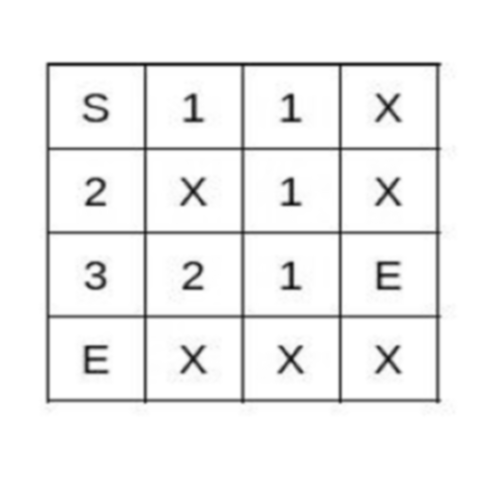

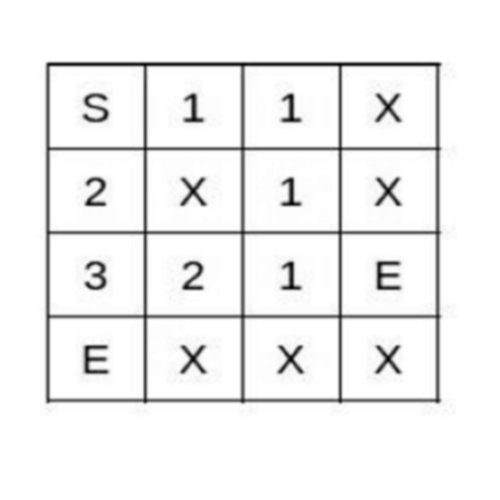

thresholded image:


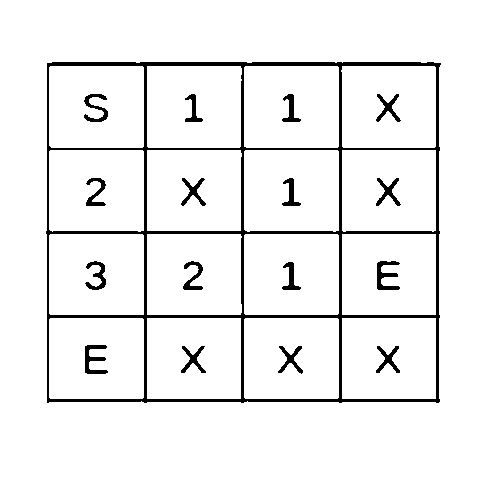

 adaptive thresholded image:


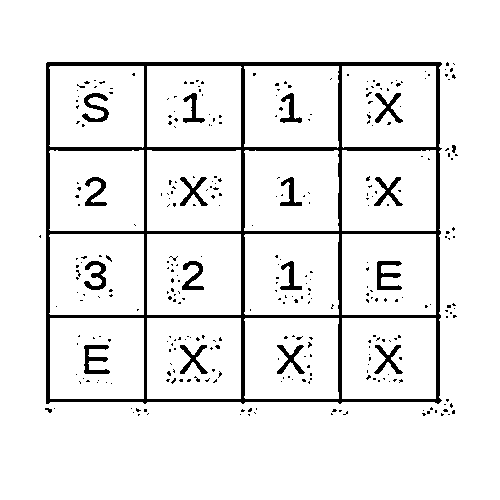

385 contour(s) found!
result image


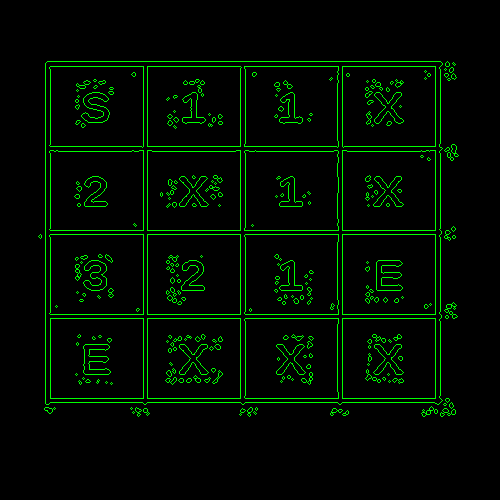

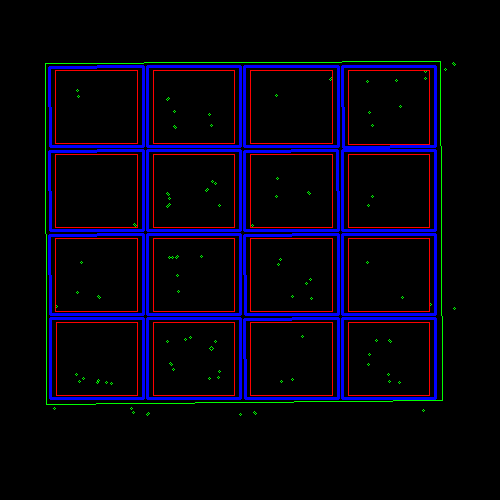

elementi matrice:  16
la matrice è una 4 x 4
lati [4, 4]


numero celle individuate:  16
resized and ordered list:


-1

In [8]:
filtered_contours = []
blank2 = None
thresh = None
min_contour_length = 25  # Soglia per la lunghezza minima dei contorni
max_square_side = 150# Soglia massima per la dimensione del lato del quadrato
cropped_areas = []  # Array per memorizzare le aree ritagliate e le informazioni sull'ordine
approx_list = [] #lista elementi approssimati
img = None


#print(type(selected_photo))
#print(selected_photo)
if type(selected_photo) == dict:
  for src in selected_photo.keys():
    selected_photo = src

while selected_photo == "":
  print("caricamento dell'immagine in corso...")

print("caricamento completato!")
image = cv.imread(selected_photo)
# image = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv/images/2X2 NO FLASH.jpeg")
# image = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv/images/rettangolare flash.jpeg")
# image = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv/images/Senza titolo.png")
# image = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv/images/imm. davide 2.jpeg")
# image = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv/images/5.jpeg")
# image = cv.imread("/content/drive/MyDrive/Colab Notebooks/opencv/images/WhatsApp Image 2023-08-09 at 13.49.22.jpeg")


gray = set_image(image)


##la threshold cerca di binarizzare l'immagine in bianco e nero basandosi sul numero soglia che gli diamo

normal = contrast_stretching(gray)
cv2_imshow(normal)
ret, thresh = cv.threshold(normal, 135, 255, cv.THRESH_BINARY)#brutta e cattiva
print("thresholded image:")
cv2_imshow(thresh)

#adattiva

th_GAUSSIAN = cv.adaptiveThreshold(normal,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, 11,2)
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(th_GAUSSIAN, cv.MORPH_OPEN, kernel, iterations=1)
print(" adaptive thresholded image:")
cv2_imshow(th_GAUSSIAN)

result_image = delete_external_border(th_GAUSSIAN)#inserisco in result_image l'immagine con i bordi esterni eliminati

#in questo metodo vado ad approssimare i contorni e vado a riconoscere i quadrati presenti all'interno della
#griglia (con vari controlli) e stampo tutto disengando su un'immagine blank
findAndDrawSquare(result_image)

num_cells = 0

def sort_key(array):
    y = array[0][0][1]  # Coordinata y del primo elemento
    return y

# Ordina l'array in base alla coordinata y
approx_list.sort(key=sort_key)
cv2_imshow(blank2)

lista_ordinata, lati = sort_cells(approx_list)
print("lati", lati)

#prendo le immagini e faccio una resize per mandarle al modello
for index, area_info in enumerate(cropped_areas):
    cropped_area = area_info["area"]#contiene le immagini
    # print("tipo: ", type(cropped_area))
    #print(cropped_area.size)
    if cropped_area is not None and cropped_area.size:
        cropped_area_fixed = cv.resize(cropped_area, (28, 28), interpolation=cv.INTER_CUBIC)
        cv2_imshow(cropped_area_fixed)
        num_cells = index # numero celle trovate
    else:
        print("L'immagine è vuota o non valida.")
    cv.waitKey(0)  # Attendere che l'utente prema un tasto per passare all'immagine successiva
#cv.rectangle(blank2, approx[0][0], approx[1][0], (255, 0, 0), thickness=2)


print(f"numero celle individuate: ",num_cells+1)
#     print("Testo estratto:", extracted_text)

lista_immagini_ordinata = []

for elemento in lista_ordinata:
    # print("elemento", elemento)
    top_left = elemento[0][0]
    top_right = elemento[1][0]
    bottom_right = elemento[2][0]
    bottom_left = elemento[3][0]

    # Ora puoi calcolare le coordinate minime e massime di x e y
    x_min = min(top_left[0], top_right[0], bottom_right[0], bottom_left[0])
    x_max = max(top_left[0], top_right[0], bottom_right[0], bottom_left[0])
    y_min = min(top_left[1], top_right[1], bottom_right[1], bottom_left[1])
    y_max = max(top_left[1], top_right[1], bottom_right[1], bottom_left[1])

    crop_image = thresh[ int(y_min +4) : int(y_max - 3) , int(x_min + 6) : int(x_max -6)]
    lista_immagini_ordinata.append(crop_image)

print("resized and ordered list:")
for info in lista_immagini_ordinata:
  resize = cv.resize(info, (28,28), interpolation=cv.INTER_CUBIC)

  cv2_imshow(resize)

cv.waitKey(0)


#SECONDA PARTE


PREDIZIONE CON TUTTI I MODELLI E SCELTA MODELLO MIGLIORE


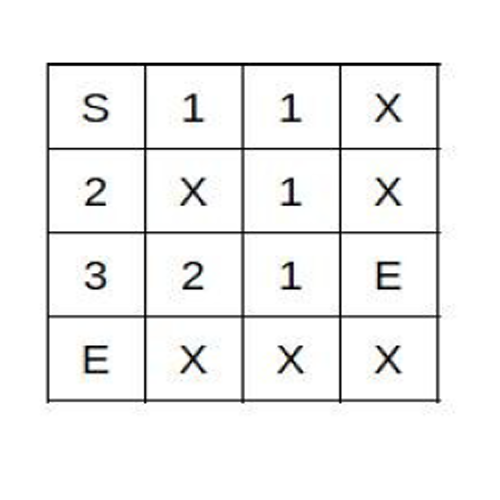

Predizione Modello ANN per caratteri artificiali:
['S', '1', '1', 'X', '2', 'X', '1', 'X', '3', '2', '1', 'E', 'E', 'X', 'X', 'X']
Predizione Modello CNN per caratteri scritti a mano:
['S', '1', '1', '1', '2', '1', '1', '1', '3', '2', '1', 'E', 'E', '1', '1', '1']
Predizione Modello ANN per caratteri scritti a mano:
['1', '1', '1', 'X', '1', 'X', '1', 'X', '1', '1', '1', '1', '1', 'X', '4', '4']
Scegli la predizione che desideri:


Button(description='Predizione Modello ANN per caratteri artificiali', layout=Layout(height='50px', width='400…

Button(description='Predizione Modello CNN per caratteri scritti a mano', layout=Layout(height='50px', width='…

Button(description='Predizione Modello ANN per caratteri scritti a mano', layout=Layout(height='50px', width='…

Hai selezionato la predizione effettuata dal primo modello
[['S', '1', '1', 'X'], ['2', 'X', '1', 'X'], ['3', '2', '1', 'E'], ['E', 'X', 'X', 'X']]


In [9]:
selected_model = ''
maze = []

# Funzione da eseguire quando viene selezionato il modello di caratteri artificiali
def select_model1(s):
    global selected_model
    global maze
    selected_model = result1
    print("Hai selezionato la predizione effettuata dal primo modello")
    maze = create_maze()
    print(maze)

# Funzione da eseguire quando viene selezionato il modello di scrittura a mano cnn
def select_model2(s):
    global selected_model
    global maze
    selected_model = result2
    print("Hai selezionato la predizione effettuata dal secondo modello")
    maze = create_maze()
    print(maze)

# Funzione da eseguire quando viene selezionato il modello di scrittura a mano ann
def select_model3(s):
    global selected_model
    global maze
    selected_model = result3
    print("Hai selezionato la predizione effettuata dal terzo modello")
    maze = create_maze()
    print(maze)

def create_maze():
  maze = []

  s = 0
  for i in range(lati[0]):
      riga = []
      for j in range(lati[1]):
          if s < len(selected_model):
              riga.append(selected_model[s])
              s = s + 1
          else:
              riga.append('')  # or any other default value
      maze.append(riga)
  return maze

# stampa l'immagine da predire
def print_image():
    cv2_imshow(img)
    # for info in lista_immagini_ordinata:
    #     cv2_imshow(info)

# Funzione per il calcolo delle predizioni. Prende in input il modello che si vuole utilizzare
def calculate_prediction(selected_model):
    predictions_list = []

    for info in lista_immagini_ordinata:

        cropped_area = info

        inverted_area = cv.bitwise_not(cropped_area)

        kernel = np.ones((1, 1), np.uint8)
        cropped_area = cv.erode(inverted_area, kernel)

        resized_image = cv.resize(cropped_area, (28, 28))
        cropped_area_fixed = resized_image / 255.0
        cropped_area_fixed = cropped_area_fixed.reshape(28, 28, 1)

        # Predizione
        prediction = selected_model.predict(np.array([cropped_area_fixed]), verbose=0)

        # Determine the predicted class
        predicted_class = prediction.argmax()

        labels = {0: '1', 1: '2', 2: '3', 3: '4', 4: 'E', 5: 'S', 6: 'X'}
        predicted_label = labels.get(predicted_class, str(predicted_class))

        predictions_list.append(predicted_label)

    return predictions_list

base_path = '/content/drive/MyDrive/Colab Notebooks/'

artificial_char_model_path = base_path + "PROGETTO_AI/artificial_char_dataset_&_model/model"
handwritten_cnn_model_path = base_path + "PROGETTO_AI/handwritten_model"
handwritten_ann_model_path = base_path + "PROGETTO_AI/handwritten_model2"

loaded_art_char_model = keras.models.load_model(artificial_char_model_path)
loaded_handwritten_cnn_model = keras.models.load_model(handwritten_cnn_model_path)
loaded_handwritten_ann_model = keras.models.load_model(handwritten_ann_model_path)

result1 = calculate_prediction(loaded_art_char_model)
result2 = calculate_prediction(loaded_handwritten_cnn_model)
result3 = calculate_prediction(loaded_handwritten_ann_model)

print_image()
print("Predizione Modello ANN per caratteri artificiali:")
print(result1)
print("Predizione Modello CNN per caratteri scritti a mano:")
print(result2)
print("Predizione Modello ANN per caratteri scritti a mano:")
print(result3)

button_art_char_model = widgets.Button(description="Predizione Modello ANN per caratteri artificiali")
button_handwritten_cnn_model = widgets.Button(description="Predizione Modello CNN per caratteri scritti a mano")
button_handwritten_ann_model = widgets.Button(description="Predizione Modello ANN per caratteri scritti a mano")

# dimensioni personalizzate dei bottoni e colore
button_art_char_model.layout.width = '400px'
button_art_char_model.layout.height = '50px'

button_handwritten_cnn_model.layout.width = '400px'
button_handwritten_cnn_model.layout.height = '50px'

button_handwritten_ann_model.layout.width = '400px'
button_handwritten_ann_model.layout.height = '50px'

button_art_char_model.style.button_color = "darkgreen"
button_handwritten_cnn_model.style.button_color = "darkgreen"
button_handwritten_ann_model.style.button_color = "darkgreen"

button_art_char_model.on_click(select_model1)
button_handwritten_cnn_model.on_click(select_model2)
button_handwritten_ann_model.on_click(select_model3)

print("Scegli la predizione che desideri:")
display(button_art_char_model)
display(button_handwritten_cnn_model)
display(button_handwritten_ann_model)

#EasyMaze Class

In [15]:
from search import *
from collections import *
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import copy
import timeit
import random

# Class for the problem
class EasyMaze(Problem):
  def __init__(self, maze, row, col):
    self.cells = []
    self.start = None
    self.goal = []
    for i in range(row):
      for j in range(col):
        if maze[i][j] == "S":
          self.start = Node(maze,None,(i,j))
          self.cells.append(self.start)
        elif maze[i][j] == "E":
          self.goal.append(Node(maze,None,(i,j)))
          self.cells.append(self.goal[len(self.goal)-1])
        else:
          self.cells.append(Node(maze,None,(i,j)))
  # Look if the state is the goal
  def goal_test(self, state):
    return state.goal_test_node(self.goal)
  # Get all the direction of a node
  def actions(self, state):
    return state.actions_node()
  # Return the node and position of an action
  def result(self, state, action):
    return state.result_node(action)

#Node class

In [16]:
#    A class for the all the cells
class Node():
    # Constructor
    def __init__(self, maze,  parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
        self.letter = ""
        self.weight = self.set_weight_letter(maze)
    # Whenever the compare 2 nodes, with this function we compare the position
    def __eq__(self, other):
        return self.position == other.position
    # Return the path of the node
    def path(self):
        path = []
        current = self
        while current is not None:
            path.append(current.position)
            current = current.parent
        return path[::-1]
    # Check if the node is the goal test
    def goal_test_node(self, end):
        for g in end:
          if self == g:
            return True
        return False
    # Get the weight of a node
    def set_weight_letter(self, maze):
        if maze[self.position[0]][self.position[1]] == "1":
            self.letter = "1"
            return 1
        if maze[self.position[0]][self.position[1]] == "2":
            self.letter = "2"
            return 2
        if maze[self.position[0]][self.position[1]] == "3":
            self.letter = "3"
            return 3
        if maze[self.position[0]][self.position[1]] == "4":
            self.letter = "4"
            return 4
        if maze[self.position[0]][self.position[1]] == "S":
            self.letter = "S"
            return 0
        if maze[self.position[0]][self.position[1]] == "E":
            self.letter = "E"
            return 1
        else:
            self.letter = "X"
            return 0
    # Returns the walkable direction from the node
    def actions_node(self):
        if self.letter == "X":
            return "No actions because this is a wall"
        moves = []
        for new_position in [[(0, -1),"Left"], [(0, 1),"Right"], [(-1, 0),"Up"], [(1, 0),"Down"]]: # Adjacent squares
            # Get node position, only up down left right
            node_position = (self.position[0] + new_position[0][0], self.position[1] + new_position[0][1]),new_position[1]
            # Make sure within range
            if node_position[0][0] > (len(maze) - 1) or node_position[0][0] < 0 or node_position[0][1] > (len(maze[len(maze)-1]) -1) or node_position[0][1] < 0:
                continue
            # Make sure walkable terrain
            if maze[node_position[0][0]][node_position[0][1]] == "X":
                continue
            moves.append(node_position[1])
        if moves: return moves; return None
    # Returns the letter and the coordinate of a movement
    def result_node(self, actions):
        result = []
        if not actions:
            return None
        for action in actions:
            for new_position in [[(0, -1),"Left"], [(0, 1),"Right"], [(-1, 0),"Up"], [(1, 0),"Down"]]:
                if action == new_position[1]:
                    node_position = (self.position[0] + new_position[0][0], self.position[1] + new_position[0][1])
                    result.append((maze[node_position[0]][node_position[1]],(node_position[0],node_position[1])))
        if result: return result; return None

#Utils

In [17]:
# Utils
# Print the path of a node from is parent with "-", also adding colors
def print_path(node,maze):
  path = node.path()
  maze_path = copy.deepcopy(maze)
  s_e = ["S","E"]
  for i in range(len(maze_path)):
    for j in range(len(maze_path[0])):
      if (i,j) in path and maze_path[i][j] not in s_e:
        maze_path[i][j] = "-"
  # Print without img, kinda trash
  # i = 0
  # j = 0
  # for row in maze:
  #   for cell in row:
  #       if (i,j) in path and cell not in s_e:
  #         print("\033[34m -\033[0m",end="") #blue
  #         maze_path[i][j] = "-"
  #       elif cell in s_e:
  #         print(" \033[32m"+str(cell)+"\033[0m",end="") #green
  #       elif cell == "X":
  #         print(" \033[31m"+str(cell)+"\033[0m",end="") #red
  #       else:
  #         print(" "+str(cell),end="") #white
  #       j = j + 1
  #   print()
  #   i = i + 1
  #   j = 0
  print()
  dimensione_pixel = 35
  # If this is the goal position
  flag = False
  if maze_path[node.position[0]][node.position[1]] == "E":
    flag = True
  img = draw_image(maze_path, dimensione_pixel,flag)
  display(img)

def draw_image(matrice, dimensione_pixel, flag):
  altezza = len(matrice)
  larghezza = len(matrice[0])
  # Create image
  img = Image.new("RGB", (larghezza * dimensione_pixel, altezza * dimensione_pixel), "white")
  draw = ImageDraw.Draw(img)
  #/usr/share/fonts/truetype
  # Set font and size
  font = ImageFont.truetype("LiberationSans-Regular.ttf", 25)
  char = ""
  # Change color of cell depending on letter
  for y in range(altezza):
      for x in range(larghezza):
          valore = matrice[y][x]
          char = valore
          if valore == "X":
            colore = "#013220" #dark green
            char = ""
          elif valore == "S":
            colore = "green"
          elif valore == "E":
            colore = "red"
          elif valore == "-":
            # Goal position
            if flag == True:
              colore = "#a7c957" # light green
            else:
              colore = "yellow"
            char = ""
          else:
            colore = "white"
          draw.rectangle(
              [(x * dimensione_pixel, y * dimensione_pixel),
                ((x + 1) * dimensione_pixel, (y + 1) * dimensione_pixel)],
              fill=colore
          )
          if char == "S" or char == "E":
            draw.text((10 + x * dimensione_pixel, 5 + y * dimensione_pixel), char, font = font,fill= "white",align ="center")
          else:
            draw.text((10 + x * dimensione_pixel, 5 + y * dimensione_pixel), char, font = font,fill= "black",align ="center")
          char = ""
  return(img)


def divide_fix(m):
  i = 0
  print("\nMatrice modificata dividendola in base alle uscite presenti\n")
  list_matrix = divide_matrix(m)
  problem_split = []
  # Create more problems, 1 for every exit
  for matrix in list_matrix:
    problem_split.append(EasyMaze(matrix, len(matrix),len(matrix[0])))
    dimensione_pixel = 35
    img = draw_image(matrix, dimensione_pixel,False)
    print("Matrice numero: "+str(i+1))
    display(img)
    print("\n")
    i = i + 1
  i = 0
  all = []
  for pfix in problem_split:
    print("\nA* del percorso numero "+str(i+1))
    start_time = timeit.default_timer()
    path, cost = astar(pfix, pfix.start, pfix.goal,list_matrix[i])
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))
    end_time = timeit.default_timer()
    all.append([i+1,cost,path,end_time - start_time])
    print("Elapsed time A*: ", end_time - start_time)
    i = i + 1
  return all

# Use this function to divide the matrix into several matrices according to the number of E's inside, each will have only 1 "E"
def divide_matrix(matrix):
    count_e = sum(row.count('E') for row in matrix)
    result = []

    if count_e == 1 or count_e == 0:
        # If only 1 "E", return the original matrix
        return [matrix]

    # Get the position in the matrix of every "E"
    e_indices = [(i, j) for i, row in enumerate(matrix) for j, val in enumerate(row) if val == "E"]

    for i in range(count_e):
        new_matrix = [row[:] for row in matrix]
        for row in new_matrix:
            # Set all the "E" to "1"
            for j in range(len(row)):
                if row[j] == 'E':
                    row[j] = "1"
        # Get the right position and put "E" on it
        e_index = e_indices[i]
        new_matrix[e_index[0]][e_index[1]] = 'E'
        result.append(new_matrix)
    return result

#Algoritmi

In [18]:
# Returns a list of tuples as a path from the given start to the given end in the maze, and return the cost f
def astar(problem, start, goal,maze):
    # If the goal or the start are blocked in every direction, is uselss to run the algo
    if check_block(start,goal):
      return None,-1
    # Initialize both open and closed list
    open_list = []
    closed_list = []
    # Add the start node
    open_list.append(start)
    # Loop until you find the end
    while len(open_list) > 0:
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        # Print the path at the moment, for the search
        print_path(current_node,maze)
        # Found the goal
        if current_node.goal_test_node(goal):
            return current_node.path(), current_node.f # Return reversed path
        # Generate children
        children = []
        moves = current_node.result_node(current_node.actions_node())
        for move in moves:
            for pos in problem.cells:
                if pos.position == move[1]: # Find the right node to append
                    children.append(pos)
        # Loop through children
        for child in children:
            # Check if child is good to go
            bool = False
            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    bool = True
                    break
            if bool:
                continue # Skip to the next child
            # Create temp f, g, and h values
            g = current_node.g + child.weight
            h = manhattan_distance(child,goal)
            f = g + h
            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and g > open_node.g:
                    bool = True
                    break
            if bool:
                continue   # Skip to the next child
            # Acceptable child, get the temp var
            child.g = g
            child.h = h
            child.f = f
            # Add the child to the open list and parent
            child.parent = current_node
            open_list.append(child)
    # No path found
    return None,-1

def manhattan_distance(start, goal):
  # Calculate the horizontal and vertical distances between the two nodes.
  # Return the sum of the two distances.
  return abs(start.position[0] - goal[0].position[0]) + abs(start.position[1] - goal[0].position[1])

# BFS
def breadth_first_search(problem,start,goal):
    # If the goal or the start are blocked in every direction, is uselss to run the algo
    if check_block(start,goal):
      return None,-1
    frontier = []
    reached = []
    frontier.append(start)
    while frontier:
        # Get the first node of the frontier (FIFO)
        node = frontier.pop(0)
        print_path(node,maze)
        # Check if goal
        if node.goal_test_node(goal):
            return node.path(), node.g
        reached.append(node)
        # Generate children
        children = []
        moves = node.result_node(node.actions_node())
        for move in moves:
            for pos in problem.cells:
                if pos.position == move[1]: # Find the right node to append
                    children.append(pos)
        # Append the right child
        for child in children:
            if child not in reached:
                child.g = node.g + child.weight
                child.parent = node
                frontier.append(child)
                reached.append(child)
    return None,-1

# DFS
def deep_first_search(problem,start,goal):
    # If the goal or the start are blocked in every direction, is uselss to run the algo
    if check_block(start,goal):
      return None,-1
    discover = []
    # Call the recursive DFS, also with discover array
    if deep_first_search_helper(problem,start,discover,goal):
      chosen = None
      flag = -1
      for g in goal:
        if len(g.path()) > flag:
          chosen = g
          flag = len(chosen.path())
      print_path(chosen,maze)
      return chosen.path(), chosen.g
    else:
      return None, -1
def deep_first_search_helper(problem,node,discover,goal):
    discover.append(node)
    if node.goal_test_node(goal):
      return True
    print_path(node,maze)
    children = []
    moves = node.result_node(node.actions_node())
    for move in moves:
        for pos in problem.cells:
            if pos.position == move[1]: # Find the right node to append
                children.append(pos)
    for child in children:
      if child not in discover:
        child.g = node.g + child.weight
        child.parent = node
        if deep_first_search_helper(problem,child,discover,goal):
          return True
    return False

# If the goal or the start are blocked in every direction, is uselss to run the algo
def check_block(start,goal):
  if not start.actions_node():
    return True
  i = 0
  for g in goal:
    if not g.actions_node():
      i = i + 1
  if i == len(goal):
    return True
  else:
    return False

#Start


Matrice non modificata



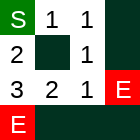




BFS



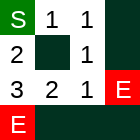

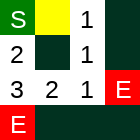

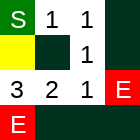

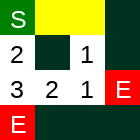

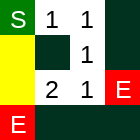

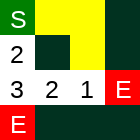

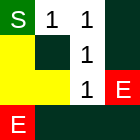

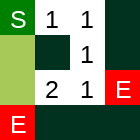


path [(0, 0), (1, 0), (2, 0), (3, 0)]
costo del cammino = 6

DFS



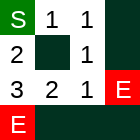

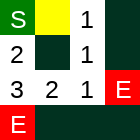

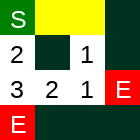

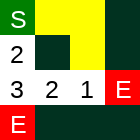

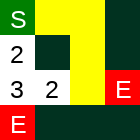

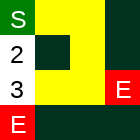

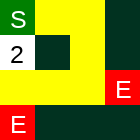

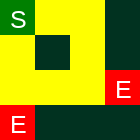

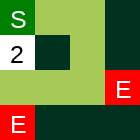


path [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0)]
costo del cammino = 10

Matrice modificata dividendola in base alle uscite presenti

Matrice numero: 1


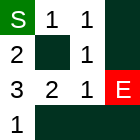



Matrice numero: 2


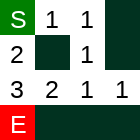




A* del percorso numero 1



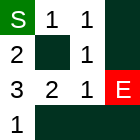

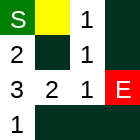

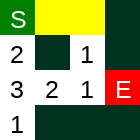

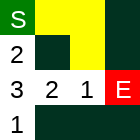

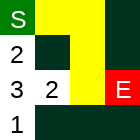

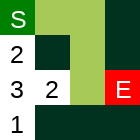


path [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3)]
costo del cammino = 5
Elapsed time A*:  0.062055189999995264

A* del percorso numero 2



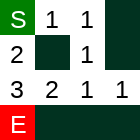

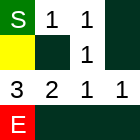

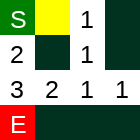

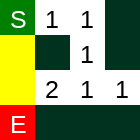

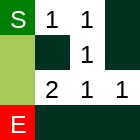


path [(0, 0), (1, 0), (2, 0), (3, 0)]
costo del cammino = 6
Elapsed time A*:  0.043985982999998896

La migliore soluzione, cioè il path cost minore è : 5 nella/e matrice numero: 1  


A parità di costo possiamo controllare il tempo, in questo caso la migliore è: 1 con tempo: 0.062055189999995264


In [19]:
if __name__ == '__main__' :
    #sys.setrecursionlimit(2000)

    print("\nMatrice non modificata\n")
    problem = EasyMaze(maze, len(maze),len(maze[0]))
    dimensione_pixel = 35
    img = draw_image(maze, dimensione_pixel,False)
    display(img)
    print("\n")

    print("\nBFS")
    path, cost= breadth_first_search(problem,problem.start,problem.goal)
    #print_path(problem.goal)
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))

    print("\nDFS")
    path, cost= deep_first_search(problem,problem.start,problem.goal)
    #print_path(problem.goal)
    if path == None:
        print("Non esiste un path")
    else:
        print("\npath "+str(path)+"\ncosto del cammino = "+str(cost))

    all = divide_fix(maze)
    try:
      best_cost = min(i[1] for i in all if i[1] >= 0)
      last = []
      for row in all:
        if row[1] == best_cost:
          last.append(row)
      print("\nLa migliore soluzione, cioè il path cost minore è : "+ str(best_cost)+" nella/e matrice numero: ",end="")
      for i in last:
        print(str(i[0])+"  ",end="")
      print("\n\n")
      best_time = min(i[3] for i in last)
      fin = 0
      for row in last:
        if row[3] == best_time:
          fin = row[0]
      print("A parità di costo possiamo controllare il tempo, in questo caso la migliore è: "+ str(fin)+ " con tempo: "+str(best_time))
    except:
      print("Non esiste un path")
